# Test `datasets`

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

## Solve problem of `split_dataset`

In [2]:
dataset = Dataset('wine', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)

In [83]:
import random
indexes_outliers = np.where(dataset.y==1)[0].tolist()
indexes_inliers = np.where(dataset.y==0)[0].tolist()
random.shuffle(indexes_outliers)
random.shuffle(indexes_inliers)
p=len(indexes_outliers)/dataset.shape[0]
dim_train = int(len(dataset.X)*0.6)
dataset.X_train = np.zeros((dim_train,dataset.X.shape[1]))
dataset.y_train = np.zeros(dim_train)

In [70]:
len(indexes_inliers)+len(indexes_outliers),dim_train

(768, 614)

In [71]:
len(indexes_inliers)

500

In [74]:
614*0.9

552.6

In [76]:
(dim_train-len(indexes_inliers))/dim_train

0.18566775244299674

In [79]:
len(indexes_inliers)/dataset.X.shape[0]

0.6510416666666666

In [84]:
c_out=0
c_in=0
for i in range(dim_train):
    if i < dim_train*0.1 and len(indexes_outliers) > 0:
        c_out+=1
        print(c_out)
        print(indexes_outliers)
        index = indexes_outliers.pop()
    else:
        c_in+=1
        print(c_in)
        print(indexes_inliers)
        print('Inlier')
        index = indexes_inliers.pop()
    # print(index)
    # break
    dataset.X_train[i] = dataset.X[index]
    dataset.y_train[i] = dataset.y[index]


1
[48, 237, 618, 719, 214, 25, 535, 93, 306, 458, 220, 606, 14, 338, 429, 16, 236, 664, 64, 584, 61, 216, 388, 197, 130, 498, 357, 696, 663, 417, 187, 750, 235, 109, 638, 132, 321, 759, 408, 415, 369, 154, 24, 308, 681, 404, 287, 270, 17, 13, 70, 6, 143, 11, 328, 586, 300, 748, 569, 230, 409, 691, 655, 231, 485, 546, 766, 541, 259, 604, 598, 440, 662, 708, 683, 164, 739, 332, 424, 642, 0, 209, 175, 99, 206, 266, 356, 26, 207, 170, 443, 542, 264, 397, 732, 152, 195, 484, 689, 280, 9, 360, 754, 635, 189, 695, 314, 312, 561, 128, 100, 588, 476, 716, 414, 630, 480, 261, 171, 712, 317, 56, 227, 116, 580, 188, 43, 349, 292, 592, 539, 455, 666, 323, 322, 755, 301, 296, 4, 709, 702, 590, 659, 540, 193, 242, 400, 391, 72, 177, 493, 667, 363, 192, 661, 731, 179, 510, 516, 293, 648, 646, 406, 445, 359, 255, 722, 213, 386, 19, 706, 693, 515, 219, 199, 506, 375, 298, 165, 114, 243, 425, 419, 603, 370, 676, 303, 284, 22, 715, 2, 66, 366, 45, 402, 125, 612, 53, 355, 155, 523, 88, 37, 186, 129, 761, 8

In [33]:
c_out,c_in

(0, 119)

In [34]:
dataset.X_train.shape

(119, 13)

## `X,y`

In [3]:
from pyod.models.dif import DIF

dif_model = DIF()
for i in range(3):
    dif_model.fit(dataset.X)


In [32]:
I = ExtendedIsolationForest(1, n_estimators=100, max_depth=30)
I.fit(dataset.X)

In [7]:
I.avg_number_of_nodes

6122.52

In [3]:

from sklearn.metrics import average_precision_score
precisions = []
deviations = []
values_=[]
for d in range(100):
    I = ExtendedIsolationForest(1, n_estimators=100, max_depth=d)
    I.fit(dataset.X)
    precisions.append(average_precision_score(dataset.y, I.predict(dataset.X)))
    imp=I.global_importances(dataset.X)
    deviations.append(np.std(imp))
    values_.append(imp)


0it [00:00, ?it/s]Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x10f944670>
Traceback (most recent call last):
  File "/Users/alessio/.virtualenvs/venv/lib/python3.9/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 
100it [00:41,  2.39it/s]
/Users/alessio/Documents/ExIFFI/notebooks/../model_reboot/EIF_reboot.py:300: RuntimeWarning: invalid value encountered in divide
  return (outliers_importances/outliers_normals)/(inliers_importances/inliers_normals)
100it [00:00, 9632.11it/s]
100it [00:00, 1277.63it/s]
100it [00:00, 3796.82it/s]
100it [00:00, 5438.95it/s]
100it [00:00, 2746.51it/s]
100it [00:00, 4351.80it/s]
100it [00:00, 508.81it/s]
100it [00:00, 1126.99it/s]
100it [00:00, 1466.19it/s]
100it [00:00, 1806.10it/s]
100it [00:00, 1344.72it/s]
100it [00:00, 752.54it/s]
100it [00:00, 507.51it/s]
100it [00:00, 1097.63it/s

KeyboardInterrupt: 

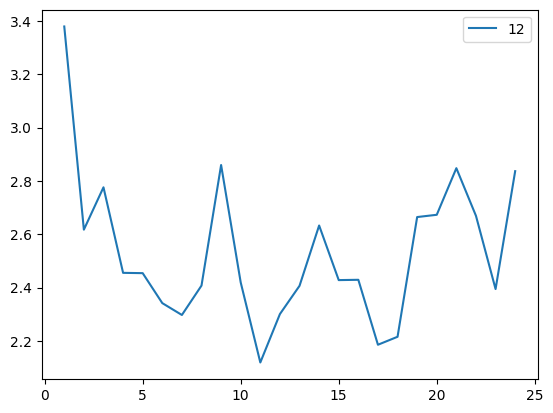

In [7]:
import matplotlib.pyplot as plt
# plt.plot(precisions)
# plt.plot(deviations)
for i in range(12,13):
    plt.plot([x[i] for x in values_[0:100]],label=str(i))
plt.legend()
plt.show()

In [34]:
print(12_)
np.std(I.global_importances(dataset.X))

0it [00:00, ?it/s]

100it [00:00, 817.12it/s]


[1.37616069 1.45433575 1.41724674 1.45072977 1.38055283 1.43747219
 1.4017655  1.37982971 1.4389898  1.50713838 1.38460577 1.42363938
 1.41836845]


100it [00:00, 998.09it/s]


0.036240194782634044

In [8]:
dif_model.decision_scores_

array([0.32370204, 0.31020521, 0.32663136, 0.32455299, 0.34409728,
       0.3088488 , 0.37344515, 0.31044738, 0.31257767, 0.31348678,
       0.35250615, 0.38477286, 0.34827564, 0.3286497 , 0.38747818,
       0.34435141, 0.30281624, 0.34978805, 0.35210064, 0.35222281,
       0.41087092, 0.30916565, 0.37614845, 0.33706403, 0.38068482,
       0.39674176, 0.32456198, 0.34921915, 0.29856177, 0.31184235,
       0.31806577, 0.33128089, 0.34384877, 0.32186876, 0.37856918,
       0.36606445, 0.32664802, 0.328958  , 0.32927542, 0.32399297,
       0.31438975, 0.34501336, 0.34010603, 0.37228866, 0.34541972,
       0.38378017, 0.32408241, 0.39845287, 0.32025195, 0.35266276,
       0.34794084, 0.35138621, 0.33568084, 0.31300203, 0.30546317,
       0.32215494, 0.39602   , 0.31326639, 0.32534448, 0.31381847,
       0.33658528, 0.37523751, 0.328167  , 0.37750206, 0.30932106,
       0.3089411 , 0.39619262, 0.32735377, 0.30736825, 0.31033868,
       0.30964242, 0.32920774, 0.36137896, 0.31275649, 0.32881

In [13]:
from utils_reboot.utils import *
path_experiment_matrices = "/Users/alessio/Documents/ExIFFI/experiments/results/wine/experiments/contamination/precisions"
precisions = open_element(get_most_recent_file(path_experiment_matrices))

In [17]:
precisions[1].shape

(11, 10, 13)

In [4]:
X_train,X_test,y_train,y_test = dataset.partition_data(dataset.X,dataset.y)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (119, 13)
X_test shape: (10, 13)
y_train shape: (119,)
y_test shape: (10,)


### `pre_process` with split

In [14]:
dataset.split_dataset()
dataset.pre_process()
print(f'X_train shape: {dataset.X_train.shape}')
print(f'X_test shape: {dataset.X_test.shape}')
print(f'y shape: {dataset.y.shape}')
print(f'X shape: {dataset.X.shape}')

X_train shape: (103, 13)
X_test shape: (129, 13)
y shape: (129,)
X shape: (129, 13)


In [15]:
X_test_split=dataset.X_test

### `pre_process` without `split`

In [16]:
dataset.split_dataset()
dataset.pre_process(split=False)
print(f'X_train shape: {dataset.X_train.shape}')
print(f'X_test shape: {dataset.X_test.shape}')
print(f'y shape: {dataset.y.shape}')
print(f'X shape: {dataset.X.shape}')

X_train shape: (119, 13)
X_test shape: (129, 13)
y shape: (129,)
X shape: (129, 13)


In [17]:
X_test_no_split=dataset.X_test

In [20]:
compare=X_test_split==X_test_no_split
compare

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
X_test_split[0,0]

0.6446910825712454

In [22]:
X_test_no_split[0,0]

0.850308189792633

In [6]:
dataset.pre_process(X_train,X_test,split=False)

X_train not loaded. Load it running split_dataset() first


array([1.45570221, 0.97099082, 1.37818928, 1.7536564 , 1.49118793,
       1.51978639, 1.63866458, 1.07169841, 1.48211212, 1.10904872,
       1.03238004, 1.20685246, 1.66380843])

100it [00:00, 4527.14it/s]


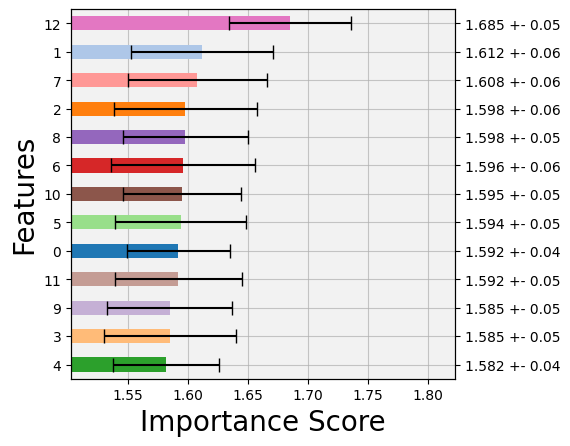

In [13]:
dataset.X.shape

## `X_train,y_train`

In [11]:
dataset.split_dataset()

In [12]:
X_train1,X_test1,y_train1,y_test1 = dataset.partition_data(dataset.X_train,dataset.y_train)
print(f'X_train shape: {X_train1.shape}')
print(f'X_test shape: {X_test1.shape}')
print(f'y_train shape: {y_train1.shape}')
print(f'y_test shape: {y_test1.shape}')

X_train shape: (93, 13)
X_test shape: (10, 13)
y_train shape: (93,)
y_test shape: (10,)


In [13]:
X_train,X_test,X,y=dataset.pre_process(X_train,X_test)

## Feature Names 

### `pima`

In [10]:
data=pd.read_csv('../data/real/pima.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### `moodify`

In [12]:
data=pd.read_csv('../data/real/moodify.csv')
data.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,Target
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,0
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,0
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,0
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,0


In [13]:
data.columns

Index(['Unnamed: 0', 'duration (ms)', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'spec_rate', 'Target'],
      dtype='object')

### `diabetes`

In [14]:
data=pd.read_csv('../data/real/diabetes.csv')
data.head()

,Unnamed: 0,age,bmi,HbA1c_level,blood_glucose_level,Target
0,0,80.0,25.19,6.6,140,0
1,1,54.0,27.32,6.6,80,0
2,2,28.0,27.32,5.7,158,0
3,3,36.0,23.45,5.0,155,0
4,4,76.0,20.14,4.8,155,0


In [15]:
data.columns

Index(['Unnamed: 0', 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'Target'],
      dtype='object')

## Test `feature_ names`

In [4]:
dataset = Dataset("wine", path = "../data/real/")
dataset.feature_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
dataset = Dataset("pima", path = "../data/real/")
dataset.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
dataset = Dataset("moodify", path = "../data/real/")
dataset.feature_names

['duration (ms)',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'spec_rate']

In [7]:
dataset = Dataset("diabetes", path = "../data/real/")
dataset.feature_names

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

## Test `performance` function

In [3]:
dataset = Dataset("wine", path = "../data/real/")
dataset.drop_duplicates()

In [4]:
dataset.split_dataset()
dataset.pre_process()

### `EIF+`

In [4]:
I=ExtendedIsolationForest(True,n_estimators=100)
I.fit(dataset.X_train)

In [5]:
dataset.y.shape

(129,)

In [20]:
y_pred=np.array(I._predict(dataset.X_test,p=0.1),dtype=int)
y_pred.shape

(129,)

In [22]:
perf_df=performance(y_pred,dataset.y,model_name=I.name,dataset_name=dataset.name,filename="perf")

In [23]:
perf_df

,Model,Dataset,Contamination,Train Size,Precision,Recall,f1 score,Accuracy,Balanced Accuracy,Average Precision,ROC AUC Score
2024-02-20 17:50:36.075892,EIF+,wine,0.1,0.8,0.0,0.0,0.0,0.829457,0.44958,0.077519,0.44958


### `EIF`

In [5]:
I=ExtendedIsolationForest(False,n_estimators=100)
I.fit(dataset.X_train)

In [7]:
y_pred=np.array(I._predict(dataset.X_test,p=0.1),dtype=int)
perf_df=performance(y_pred,dataset.y,model_name=I.name,dataset_name=dataset.name,filename="perf")

In [8]:
perf_df

,Model,Dataset,Contamination,Train Size,Precision,Recall,f1 score,Accuracy,Balanced Accuracy,Average Precision,ROC AUC Score
2024-02-20 17:57:14.551894,EIF,wine,0.1,0.8,0.166667,0.2,0.181818,0.860465,0.557983,0.095349,0.557983


### `IF`

In [5]:
I=IsolationForest(n_estimators=100)
I.fit(dataset.X_train)

In [6]:
I.name

'IF'

In [7]:
y_pred=np.array(I._predict(dataset.X_test,p=0.1),dtype=int)
perf_df=performance(y_pred,dataset.y,model_name=I.name,dataset_name=dataset.name,filename="perf")

In [8]:
perf_df

,Model,Dataset,Contamination,Train Size,Precision,Recall,f1 score,Accuracy,Balanced Accuracy,Average Precision,ROC AUC Score
2024-02-20 18:00:23.458732,IF,wine,0.1,0.8,0.083333,0.1,0.090909,0.844961,0.503782,0.078101,0.503782


## `syn` data

In [2]:
import os
import pickle
import matplotlib.pyplot as plt

In [3]:
os.chdir('../data/syn')
os.getcwd()

'/home/davidefrizzo/Desktop/PHD/ExIFFI/data/syn'

Training Set

In [4]:
file_to_read = open(os.getcwd()+'/ball_6_dim.pkl', "rb")
loaded_dictionary = pickle.load(file_to_read)
X_train=loaded_dictionary['X_train']

In [5]:
X_train.shape

(1000, 6)

Test Sets

In [6]:
file_to_read = open(os.getcwd()+'/anomalies.pkl', "rb")
loaded_dictionary = pickle.load(file_to_read)
X_xaxis,X_yaxis,X_bisect,X_bisect_3d,X_bisect_6d=loaded_dictionary['X_xaxis'],loaded_dictionary['X_yaxis'],loaded_dictionary['X_bisec'],loaded_dictionary['X_bisec_3d'],loaded_dictionary['X_bisec_6d']

Merge Train Set with Test Set and save them into a csv file 

### `Xaxis`

In [7]:
in_target=np.zeros(X_train.shape[0],dtype=int)
out_target=np.ones(X_xaxis.shape[0],dtype=int)
target=np.concatenate((in_target,out_target),axis=0)

In [8]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
Xaxis=np.r_[X_train,X_xaxis]
Xaxis=np.c_[Xaxis,target]
Xaxis.shape

(1100, 7)

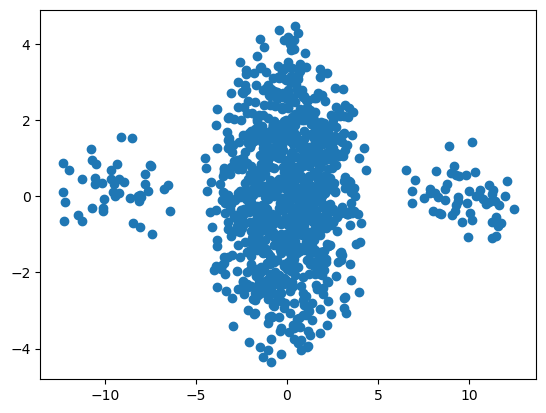

In [10]:
plt.plot(Xaxis[:,0],Xaxis[:,1],'o')

In [11]:
Xaxis_df=pd.DataFrame(Xaxis)
Xaxis_df.head()

,0,1,2,3,4,5,6
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


In [12]:
Xaxis_df=Xaxis_df.rename(columns={6:'Target'})

In [13]:
Xaxis_df.head()

,0,1,2,3,4,5,Target
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


In [14]:
Xaxis_df.to_csv('Xaxis.csv')

In [15]:
data=pd.read_csv('Xaxis.csv') 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,Target
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


### `Yaxis`

In [16]:
in_target=np.zeros(X_train.shape[0],dtype=int)
out_target=np.ones(X_yaxis.shape[0],dtype=int)
target=np.concatenate((in_target,out_target),axis=0)

In [17]:
Yaxis=np.r_[X_train,X_yaxis]
Yaxis=np.c_[Yaxis,target]
Yaxis.shape

(1100, 7)

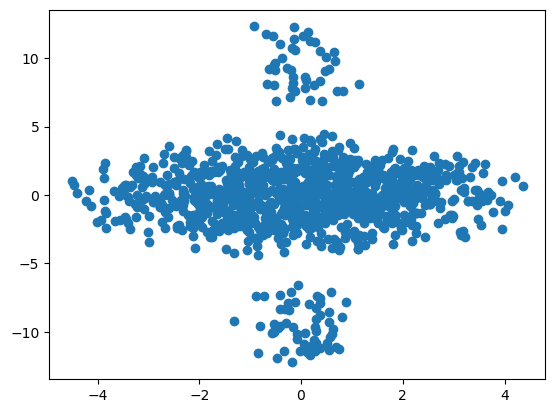

In [18]:
plt.plot(Yaxis[:,0],Yaxis[:,1],'o')

In [19]:
Yaxis_df=pd.DataFrame(Yaxis)
Yaxis_df.tail()

,0,1,2,3,4,5,6
1095,-0.556441,11.636229,-0.752279,-0.067419,0.492850,0.660079,1.0
1096,0.372493,8.354086,-0.424221,-0.120650,0.031996,-0.225076,1.0
1097,-0.112649,-7.807477,0.404249,-0.328046,-0.622331,0.696148,1.0
1098,-0.670560,8.130342,-0.184914,-0.375024,-1.222163,0.182739,1.0
1099,0.624264,-9.817021,0.454289,-0.412503,-0.051223,0.348095,1.0


In [20]:
Yaxis_df=Yaxis_df.rename(columns={6:'Target'})

In [21]:
Yaxis_df.to_csv('Yaxis.csv')

In [22]:
data=pd.read_csv('Yaxis.csv') 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,Target
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


### `Bisect`

In [23]:
in_target=np.zeros(X_train.shape[0],dtype=int)
out_target=np.ones(X_bisect.shape[0],dtype=int)
target=np.concatenate((in_target,out_target),axis=0)

In [24]:
bisect=np.r_[X_train,X_bisect]
bisect=np.c_[bisect,target]
bisect.shape

(1100, 7)

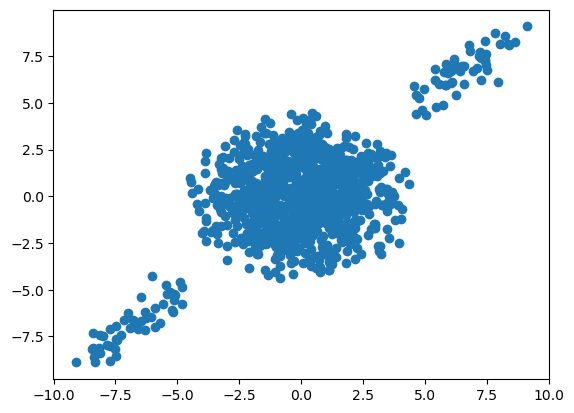

In [25]:
plt.plot(bisect[:,0],bisect[:,1],'o')

In [26]:
bisect_df=pd.DataFrame(bisect)
bisect_df.tail()

,0,1,2,3,4,5,6
1095,4.559584,5.898685,-0.038913,-0.165807,-0.024745,-0.669735,1.0
1096,-7.427031,-7.692899,-0.553767,-0.217572,0.838377,-0.137756,1.0
1097,8.247202,8.589750,-0.118215,0.832420,0.180314,0.360806,1.0
1098,6.487272,6.998935,0.124564,0.717201,-1.108774,-0.278491,1.0
1099,6.801003,7.771761,0.272454,0.589183,-0.170625,0.109667,1.0


In [27]:
bisect_df=bisect_df.rename(columns={6:'Target'})

In [28]:
bisect_df.to_csv('bisect.csv')

In [29]:
data=pd.read_csv('bisect.csv') 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,Target
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


### `bisect_3d`

In [30]:
in_target=np.zeros(X_train.shape[0],dtype=int)
out_target=np.ones(X_bisect.shape[0],dtype=int)
target=np.concatenate((in_target,out_target),axis=0)

In [31]:
bisect_3d=np.r_[X_train,X_bisect_3d]
bisect_3d=np.c_[bisect_3d,target]
bisect_3d.shape

(1100, 7)

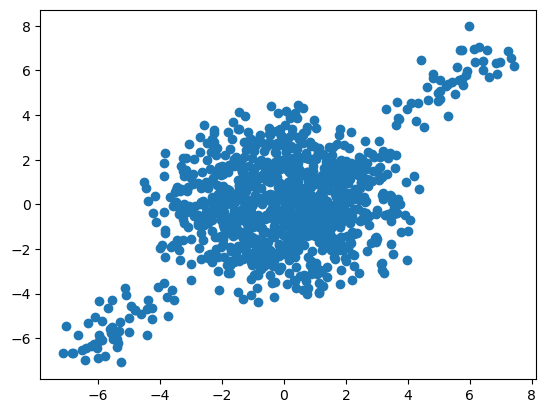

In [32]:
plt.plot(bisect_3d[:,0],bisect_3d[:,1],'o')

In [33]:
bisect_3d_df=pd.DataFrame(bisect_3d)
bisect_3d_df.tail()

,0,1,2,3,4,5,6
1095,7.215609,6.886593,6.963206,0.208843,-0.647239,-0.480668,1.0
1096,7.331378,6.563659,5.799002,-0.081246,0.374472,-0.616076,1.0
1097,5.047629,5.094055,4.076400,-1.088806,0.596552,-0.593956,1.0
1098,-4.257130,-4.642138,-4.360043,-0.446038,-0.811061,-0.047748,1.0
1099,6.298271,7.053956,6.447979,0.177028,0.518237,-0.108949,1.0


In [34]:
bisect_3d_df=bisect_3d_df.rename(columns={6:'Target'})

In [35]:
bisect_3d_df.to_csv('bisect_3d.csv')

In [36]:
data=pd.read_csv('bisect_3d.csv') 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,Target
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


### `bisect_6d`

In [37]:
in_target=np.zeros(X_train.shape[0],dtype=int)
out_target=np.ones(X_bisect.shape[0],dtype=int)
target=np.concatenate((in_target,out_target),axis=0)

In [38]:
bisect_6d=np.r_[X_train,X_bisect_6d]
bisect_6d=np.c_[bisect_6d,target]
bisect_6d.shape

(1100, 7)

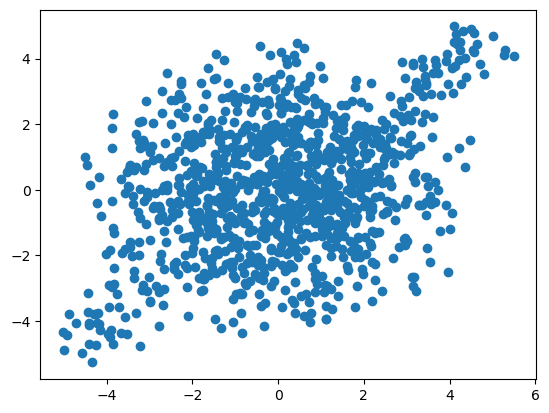

In [39]:
plt.plot(bisect_6d[:,0],bisect_6d[:,1],'o')

In [40]:
bisect_6d_df=pd.DataFrame(bisect_6d)
bisect_6d_df.tail()

,0,1,2,3,4,5,6
1095,4.140729,4.752194,4.520028,4.864238,3.993451,4.437378,1.0
1096,3.959000,3.236401,3.662869,4.619158,3.348121,3.016729,1.0
1097,3.612413,3.566588,3.318392,3.526297,2.998522,3.715005,1.0
1098,-3.162273,-2.908671,-2.639555,-2.873704,-3.590031,-2.423722,1.0
1099,-4.443792,-3.724579,-4.169184,-5.051567,-5.114577,-4.936394,1.0


In [41]:
bisect_6d_df.to_csv('bisect_6d.csv')

In [42]:
data=pd.read_csv('bisect_6d.csv') 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6
0,2.248670,0.239891,-0.211590,0.158886,-1.202420,3.211823,0.0
1,0.868853,2.625278,-2.618327,2.574333,-0.622046,-1.367291,0.0
2,-0.764090,1.906910,2.565642,1.191976,-1.906817,2.895978,0.0
3,0.198646,3.847016,1.644304,0.362293,1.101001,-1.305508,0.0
4,-0.359897,0.428938,-1.657683,2.181245,2.810369,2.503783,0.0


## `test_feature_selection`

In [2]:
import os
os.getcwd()

'/home/davidefrizzo/Desktop/PHD/ExIFFI/notebooks'

In [3]:
os.chdir('../experiments/results')

In [4]:
from utils_reboot.utils import *
path=os.path.join(os.getcwd(),'wine','experiments','feature_selection','EIF+','EXIFFI')
file_path=get_most_recent_file(path)
feat_sel_results=pickle.load(open(file_path,'rb'))

In [8]:
from collections import namedtuple

In [10]:
Precisions = namedtuple("Precisions",["direct","inverse","name","model"])
file_data = Precisions(f,f_inverse, dataset.name , "EIF+")



In [11]:
from utils_reboot.utils import *
filename = "feature_selection_" + dataset.name + "EIF+" 
save_element(file_data, "/Users/alessio/Documents/ExIFFI/experiments/results", "feature_selecion")

In [16]:
file_data.direct

array([[0.90339744, 0.77596237, 0.89116439, 0.84820513, 0.85232601,
        0.86304029, 0.74710859, 0.80096237, 0.85939394, 0.80905761],
       [0.11622425, 0.12953908, 0.13226028, 0.10716622, 0.11815163,
        0.13148724, 0.10961964, 0.12279168, 0.10393088, 0.12292346],
       [0.11263896, 0.1404861 , 0.11822235, 0.15252335, 0.1184039 ,
        0.12012553, 0.14315323, 0.13146417, 0.13484068, 0.12805929],
       [0.14079358, 0.13295655, 0.13800034, 0.11605536, 0.13806554,
        0.10620509, 0.11766201, 0.11759462, 0.13729383, 0.12653016],
       [0.13068759, 0.11995586, 0.10864809, 0.1346926 , 0.14924273,
        0.13139308, 0.12728011, 0.13354333, 0.14075295, 0.13139002],
       [0.14455037, 0.10610997, 0.14005257, 0.13674557, 0.13927454,
        0.1452046 , 0.14559764, 0.10246393, 0.13209989, 0.14596649],
       [0.12960526, 0.12163903, 0.11787601, 0.11397679, 0.10999328,
        0.12094114, 0.12881707, 0.12827468, 0.11675884, 0.1346759 ],
       [0.11112251, 0.11018401, 0.1075130

In [20]:
feat_sel_results

[Precisions(direct=array([[0.76415751, 0.7530464 , 0.72184861, 0.83653846, 0.76625541,
         0.7542957 , 0.72323954, 0.83399835, 0.81593712, 0.74960784],
        [0.11637011, 0.13434681, 0.12182495, 0.10678182, 0.10762558,
         0.10504888, 0.11308167, 0.10027026, 0.12055582, 0.11569538],
        [0.11313663, 0.11317197, 0.08869077, 0.12059059, 0.11222733,
         0.10360544, 0.11324325, 0.11019644, 0.10167287, 0.11335457],
        [0.09606415, 0.10284295, 0.11560788, 0.14709619, 0.11101186,
         0.12025349, 0.09627291, 0.11328528, 0.10322563, 0.10617522],
        [0.11148043, 0.0977555 , 0.11449916, 0.1067221 , 0.10529973,
         0.11212193, 0.11298987, 0.11089343, 0.10373015, 0.1069518 ],
        [0.10706369, 0.11064291, 0.10520711, 0.12442819, 0.12602652,
         0.13427481, 0.11410716, 0.14219883, 0.1178195 , 0.12776099],
        [0.13731579, 0.12048466, 0.10288457, 0.11267303, 0.11190819,
         0.11368209, 0.11126332, 0.12003519, 0.11290276, 0.1161357 ],
        [

## Test `feature_importances` IForest PyOD

In [7]:
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt

In [9]:
dataset = Dataset("Xaxis", path = "../data/syn/")
dataset.drop_duplicates()
dataset.pre_process()

In [11]:
I=IForest()
I.fit(dataset.X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [16]:
imps=I.feature_importances_
imp_ord=np.argsort(imps)[::-1]  

In [17]:
imp_ord

array([2, 1, 4, 3, 5, 0])

## Try `RandomForest` interpretation on `DIF`

In [2]:
from pyod.models.dif import DIF

In [3]:
dataset = Dataset('wine', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(train_size=0.8,contamination=0)

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
from utils_reboot.experiments import *
DIF=DIF()
fi=experiment_global_importances(DIF,dataset,interpretation='RandomForest')

100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


In [5]:
import os
os.chdir('../experiments/results')

In [4]:
from utils_reboot.utils import *
save_element(fi,os.path.join(os.getcwd(),'wine','experiments','global_importances','DIF','RandomForest','scenario_2'))

ModuleNotFoundError: No module named 'utils_reboot'

In [6]:
from utils_reboot.utils import *
dif_path=os.path.join(os.getcwd(),'wine','experiments','global_importances','DIF','RandomForest','scenario_2')
dif_file=get_most_recent_file(dif_path)

In [7]:
dif_file

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/wine/experiments/global_importances/DIF/RandomForest/scenario_2/23-02-2024_10-21-49_.pickle'

In [8]:
path_dif_plot=os.path.join(os.getcwd(),'wine','plots')

In [9]:
os.getcwd()

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results'

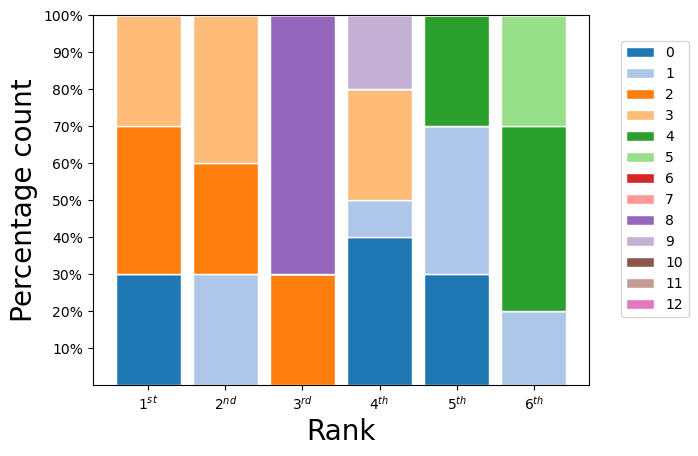

ValueError: too many values to unpack (expected 2)

In [10]:
from utils_reboot.plots import *
fig,ax=bar_plot(dataset,dif_file,filetype='pickle',plot_path=path_dif_plot,model='DIF',interpretation='EXIFFI',scenario=2)

## Try getting the $AUC_{FS}$ value

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

$AUC_{FS}$ `24-02-2024_10-06-54_.pickle`

In [3]:
path=os.path.join(os.getcwd(),'wine','experiments','feature_selection','EIF+','EXIFFI','scenario_2')
file_path=get_most_recent_file(path)
feat_sel_results=pickle.load(open(file_path,'rb'))

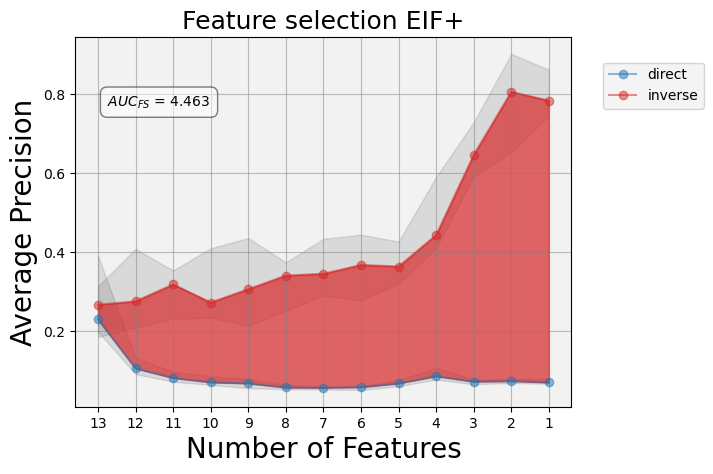

In [4]:
plot_feature_selection(file_path,plot_path=os.getcwd(),save_image=False,plot_image=True)

$AUC_{FS}$ `22-02-2024_22-07-09_.pickle`

In [39]:
os.listdir(path)

['22-02-2024_22-07-53_.pickle',
 '22-02-2024_22-07-09_.pickle',
 '24-02-2024_10-06-54_.pickle',
 '22-02-2024_21-55-38_.pickle',
 '22-02-2024_21-53-16_.pickle',
 '22-02-2024_22-24-56_.pickle']

In [41]:
file_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/wine/experiments/feature_selection/EIF+/EXIFFI/scenario_2/22-02-2024_22-07-09_.pickle'
feat_sel_results=pickle.load(open(file_path,'rb'))
feat_sel_results[0].values

4.227133197789994

$AUC_{FS}$ `'22-02-2024_21-53-16_.pickle'`

In [42]:
file_path='/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/wine/experiments/feature_selection/EIF+/EXIFFI/scenario_2/22-02-2024_21-53-16_.pickle'
feat_sel_results=pickle.load(open(file_path,'rb'))
feat_sel_results[0].values

5.021221564322534

Get `diabetes` Bar Plot

In [2]:
dataset = Dataset('diabetes', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)

In [3]:
os.chdir('../experiments/results')
path=os.path.join(os.getcwd(),'diabetes','experiments','global_importances','EIF+','EXIFFI','scenario_2')
file_path=get_most_recent_file(path)
file_path

'/home/davidefrizzo/Desktop/PHD/ExIFFI/experiments/results/diabetes/experiments/global_importances/EIF+/EXIFFI/scenario_2/24-02-2024_12-09-58_.npz'

In [4]:
min(dataset.shape[1],6)

4

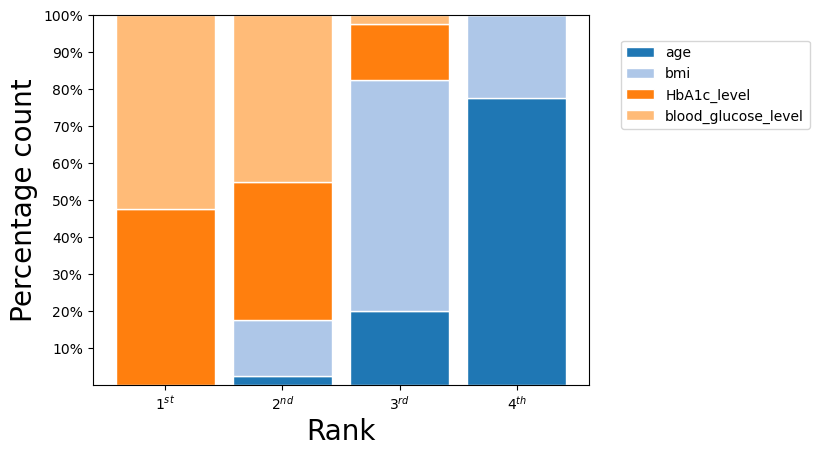

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Rank', ylabel='Percentage count'>,
       0     1     2     3
 0   0.0   0.0  47.5  52.5
 1   2.5  15.0  37.5  45.0
 2  20.0  62.5  15.0   2.5
 3  77.5  22.5   0.0   0.0)

In [6]:
path_plots=os.path.join(os.getcwd(),'diabetes','plots_new')
bar_plot(dataset, file_path, filetype="npz", plot_path=path_plots, f=min(dataset.shape[1],6), show_plot=True, model='EIF+', interpretation='EXIFFI', scenario=2)

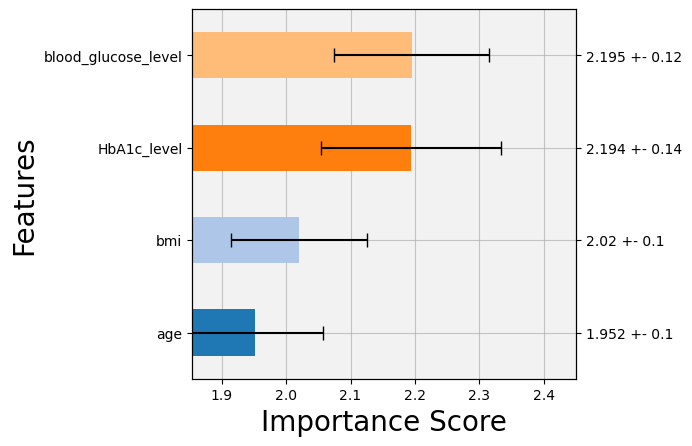

(<Axes: xlabel='Importance Score', ylabel='Features'>, <Axes: >)

In [7]:
score_plot(dataset, file_path, plot_path=path_plots, show_plot=True, model='EIF+', interpretation='EXIFFI', scenario=2)

## Fix plots

In [1]:
import os
import sys
sys.path.append('../')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest,IsolationForest
import numpy as np
import pandas as pd
from utils_reboot.datasets import Dataset
from utils_reboot.utils import *
from utils_reboot.experiments import *
from utils_reboot.plots import *
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pyod

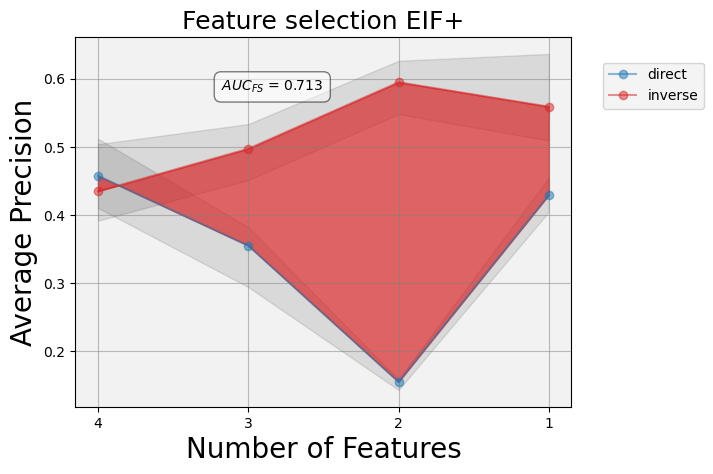

In [2]:
dataset = Dataset('diabetes', path = '../data/real/')
dataset.drop_duplicates()
dataset.split_dataset(contamination=0)
os.chdir('../experiments/results')
path=os.path.join(os.getcwd(),'diabetes','experiments','feature_selection','EIF+','EXIFFI','scenario_2')
file_path=get_most_recent_file(path)
path_plots=os.path.join(os.getcwd(),'diabetes','plots_new')
plot_feature_selection(file_path, path_plots, model='EIF+', plot_image=False)

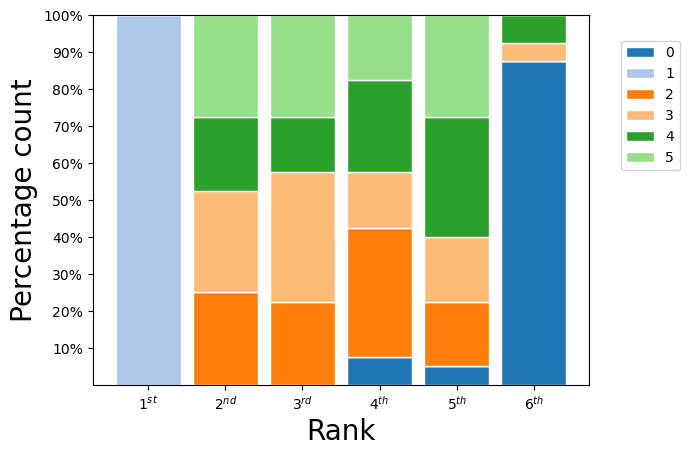

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Rank', ylabel='Percentage count'>,
       0      1     2     3     4     5
 0   0.0  100.0   0.0   0.0   0.0   0.0
 1   0.0    0.0  25.0  27.5  20.0  27.5
 2   0.0    0.0  22.5  35.0  15.0  27.5
 3   7.5    0.0  35.0  15.0  25.0  17.5
 4   5.0    0.0  17.5  17.5  32.5  27.5
 5  87.5    0.0   0.0   5.0   7.5   0.0)

In [6]:
path_plots=os.path.join(os.getcwd(),'annthyroid','plots_new')
bar_plot(dataset, file_path, filetype="npz", plot_path=path_plots, f=min(dataset.shape[1],6), show_plot=True, model='EIF', interpretation='EXIFFI', scenario=2)

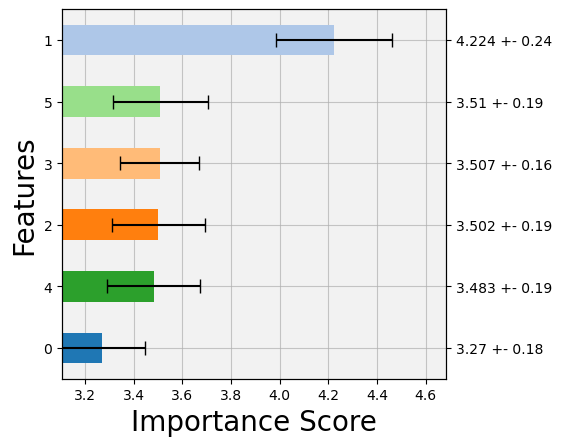

(<Axes: xlabel='Importance Score', ylabel='Features'>, <Axes: >)

In [7]:
score_plot(dataset, file_path, plot_path=path_plots, show_plot=True, model='EIF', interpretation='EXIFFI', scenario=2)